<a href="https://colab.research.google.com/github/Khushi-MA/EIS-EDA/blob/main/file1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import necessary libraries


In [ ]:
# !pip install seaborn matplotlib pandas

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

df = pd.read_csv('accuracy.csv')
df.columns

FileNotFoundError: [Errno 2] No such file or directory: 'accuracy.csv'

In [ ]:
models = ['VGG19 Accuracy', 'ResNet50 Accuracy', 'MobileNetV3 Accuracy', 'InceptionV3 Accuracy']

# Average of each column (BG)

VGG19 Accuracy	:65.43%
ResNet50 Accuracy	:68.66%
MobileNetV3 Accuracy	:72.59%
InceptionV3 Accuracy	:76.85%


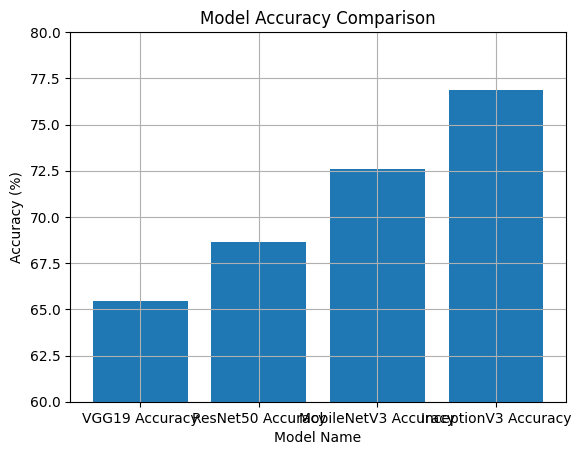

In [ ]:
# Average of each column
for x in ['VGG19 Accuracy', 'ResNet50 Accuracy', 'MobileNetV3 Accuracy', 'InceptionV3 Accuracy']:
    arr = df[x]
    res = np. mean(arr, axis=0)
    res = res*100
    print(x + "\t:" + "{:.2f}".format(res) + "%")


# Model names
models = ['VGG19 Accuracy', 'ResNet50 Accuracy', 'MobileNetV3 Accuracy', 'InceptionV3 Accuracy']

# Calculate average accuracies
accuracies = [np.mean(df[model])*100 for model in models]

# Create bar graph
plt.bar(models, accuracies)
plt.xlabel('Model Name')
plt.ylabel('Accuracy (%)')
plt.title('Model Accuracy Comparison')
plt.ylim(60,80)
plt.grid()
plt.show()


# Average of each class (L)

In [ ]:
# average of each class
for x in range(949):
    rowsum = df['InceptionV3 Accuracy'][x] + df['MobileNetV3 Accuracy'][x] + df['ResNet50 Accuracy'][x] + df['VGG19 Accuracy'][x]
    avg = (rowsum/4)*100
    print(df['Folder'][x] + "\t:" + "{:.2f}".format(avg) + "%")

screen, crt screen	:15.50%
velvet	:16.00%
monitor	:21.00%
tiger cat	:22.50%
windsor tie	:23.50%
letter opener, paper knife, paperknife	:24.00%
water jug	:24.00%
laptop, laptop computer	:24.00%
cassette player	:24.50%
hook, claw	:26.00%
spotlight, spot	:26.00%
notebook, notebook computer	:26.50%
overskirt	:26.50%
chiffonier, commode	:28.00%
night snake, hypsiglena torquata	:28.50%
sidewinder, horned rattlesnake, crotalus cerastes	:28.50%
sunglasses, dark glasses, shades	:29.00%
spatula	:30.00%
screwdriver	:30.50%
dough	:31.00%
english foxhound	:31.00%
sunscreen, sunblock, sun blocker	:31.00%
loupe, jeweler's loupe	:31.50%
cleaver, meat cleaver, chopper	:32.00%
tape player	:33.50%
flute, transverse flute	:33.50%
ladle	:33.50%
wool, woolen, woollen	:33.50%
backpack, back pack, knapsack, packsack, rucksack, haversack	:35.00%
bakery, bakeshop, bakehouse	:35.50%
space bar	:35.50%
sweatshirt	:35.50%
hair spray	:36.00%
cup	:37.50%
academic gown, academic robe, judge's robe	:38.00%
car wheel	:3

## 15 head and tails in avg accuracy (bg)

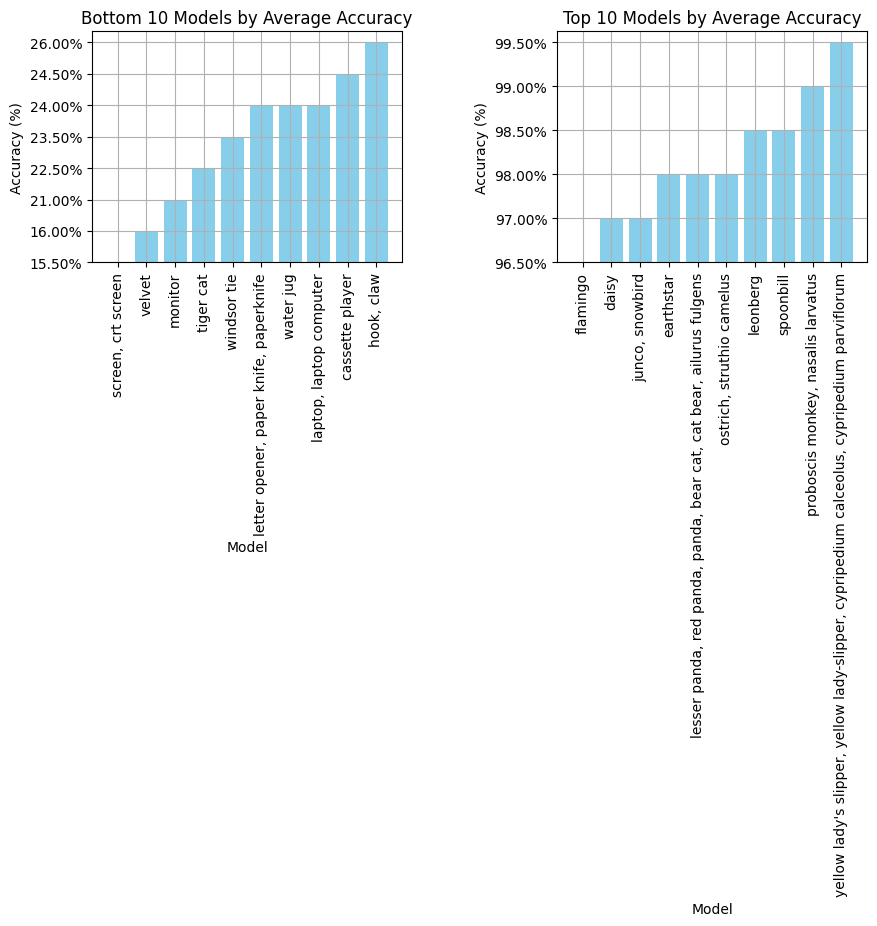

In [ ]:
import matplotlib.pyplot as plt

# Create a new DataFrame
df_row_avg = pd.DataFrame(columns=['class', 'accuracyavg'])

# List to hold results
results = []

for x in range(len(df)):
    rowsum = df['InceptionV3 Accuracy'][x] + df['MobileNetV3 Accuracy'][x] + df['ResNet50 Accuracy'][x] + df['VGG19 Accuracy'][x]
    avg = (rowsum/4)*100
    results.append({'class': df['Folder'][x], 'accuracyavg': "{:.2f}".format(avg) + "%"})

# Convert the list to a DataFrame
df_row_avg = pd.DataFrame(results)

# Display the new DataFrame
# print(df_row_avg)

df_row_avg = df_row_avg.sort_values('accuracyavg')


fig, axs = plt.subplots(1, 2, figsize=(10, 3))

# Plot the first bar graph (top 10 models)
axs[0].bar(df_row_avg['class'].head(10), df_row_avg['accuracyavg'].head(10), color='skyblue')
axs[0].set_xlabel('Model')
axs[0].set_ylabel('Accuracy (%)')
axs[0].set_title('Bottom 10 Models by Average Accuracy')
axs[0].tick_params(axis='x', rotation=90)
axs[0].grid()

# Plot the second bar graph (bottom 10 models)
axs[1].bar(df_row_avg['class'].tail(10), df_row_avg['accuracyavg'].tail(10), color='skyblue')
axs[1].set_xlabel('Model')
axs[1].set_ylabel('Accuracy (%)')
axs[1].set_title('Top 10 Models by Average Accuracy')
axs[1].tick_params(axis='x', rotation=90)
axs[1].grid()

plt.subplots_adjust(wspace=0.5)

# Show the plots
plt.show()


## Common ones in least 15 of all models

In [ ]:
# Least 15 in all and common

def get_lowest_15(df, accuracy_col, folder_name, accuracy_name):
    df_sorted = df.sort_values([accuracy_col], ascending=False)
    df_lowest_15 = df_sorted.tail(15)
    df_lowest_15 = df_lowest_15[['Folder', accuracy_col]].rename(columns={'Folder': folder_name, accuracy_col: accuracy_name})
    return df_lowest_15

df_1_lowest_15 = get_lowest_15(df, 'VGG19 Accuracy', 'foldervgg19', 'vgg19acc')
df_2_lowest_15 = get_lowest_15(df, 'ResNet50 Accuracy', 'folderresnet50', 'resnet50acc')
df_3_lowest_15 = get_lowest_15(df, 'MobileNetV3 Accuracy', 'foldermobilenetv3', 'mobilenetv3acc')
df_4_lowest_15 = get_lowest_15(df, 'InceptionV3 Accuracy', 'folderinceptionv3', 'inceptionv3acc')


# Function to find the common element in each one
def find_common_loop(arrays):
  if not arrays:  # Handle empty list of arrays
    return []

  # Find the element frequency across all arrays
  element_counts = {}
  for arr in arrays:
    for element in arr:
      element_counts[element] = element_counts.get(element, 0) + 1

  # Filter elements present in all arrays
  common_elements = [element for element, count in element_counts.items() if count == len(arrays)]
  return common_elements

# Example usage (same as Method 1)
arrays = [df_4_lowest_15['folderinceptionv3'], df_3_lowest_15['foldermobilenetv3'], df_2_lowest_15['folderresnet50'], df_1_lowest_15['foldervgg19']]
common = find_common_loop(arrays)
# print(common)


# commons in least 15 of all 4


# Merge the DataFrames on the common classes
merged_df = df_1_lowest_15[['foldervgg19', 'vgg19acc']].merge(df_2_lowest_15[['folderresnet50', 'resnet50acc']], left_on='foldervgg19', right_on='folderresnet50').merge(df_3_lowest_15[['foldermobilenetv3', 'mobilenetv3acc']], left_on='foldervgg19', right_on='foldermobilenetv3').merge(df_4_lowest_15[['folderinceptionv3', 'inceptionv3acc']], left_on='foldervgg19', right_on='folderinceptionv3')

# Select only the common classes and their respective accuracies
common_classes_df = merged_df.loc[merged_df['foldervgg19'].isin(['screen, crt screen', 'velvet', 'windsor tie'])][[
    'foldervgg19', 'vgg19acc', 'resnet50acc', 'mobilenetv3acc', 'inceptionv3acc']]

# Rename the columns for clarity
common_classes_df.columns = ['Class', 'VGG19 Accuracy', 'ResNet50 Accuracy', 'MobileNetV3 Accuracy', 'InceptionV3 Accuracy']

# Set 'Class' as the index
common_classes_df.set_index('Class', inplace=True)

# Display the new DataFrame
common_classes_df


,VGG19 Accuracy,ResNet50 Accuracy,MobileNetV3 Accuracy,InceptionV3 Accuracy
Class,,,,
windsor tie,0.20,0.20,0.22,0.32
"screen, crt screen",0.16,0.16,0.12,0.18
velvet,0.12,0.14,0.16,0.22


In [ ]:
# print("---------------------------------------------------------VGG19:")
# print(df_1_lowest_15[['foldervgg19', 'vgg19acc']])
# print("\n---------------------------------------------------------Resnet50:")
# print(df_2_lowest_15[['folderresnet50', 'resnet50acc']])
# print("\n---------------------------------------------------------MobilenetV3:")
# print(df_3_lowest_15[['foldermobilenetv3', 'mobilenetv3acc']])
# print("\n---------------------------------------------------------InceptionV3:")
# print(df_4_lowest_15[['folderinceptionv3', 'inceptionv3acc']])

,VGG19 Accuracy,ResNet50 Accuracy,MobileNetV3 Accuracy,InceptionV3 Accuracy
Class,,,,
windsor tie,0.20,0.20,0.22,0.32
"screen, crt screen",0.16,0.16,0.12,0.18
velvet,0.12,0.14,0.16,0.22


## Common ones in Highest 15 of all models

In [ ]:
# Highest 15 in all and common

def get_highest_15(df, accuracy_col, folder_name, accuracy_name):
    df_sorted = df.sort_values([accuracy_col], ascending=False)
    df_lowest_15 = df_sorted.head(15)
    df_lowest_15 = df_lowest_15[['Folder', accuracy_col]].rename(columns={'Folder': folder_name, accuracy_col: accuracy_name})
    return df_lowest_15

df_1_lowest_15 = get_highest_15(df, 'VGG19 Accuracy', 'foldervgg19', 'vgg19acc')
df_2_lowest_15 = get_highest_15(df, 'ResNet50 Accuracy', 'folderresnet50', 'resnet50acc')
df_3_lowest_15 = get_highest_15(df, 'MobileNetV3 Accuracy', 'foldermobilenetv3', 'mobilenetv3acc')
df_4_lowest_15 = get_highest_15(df, 'InceptionV3 Accuracy', 'folderinceptionv3', 'inceptionv3acc')

def find_common_loop(arrays):
  if not arrays:  # Handle empty list of arrays
    return []

  # Find the element frequency across all arrays
  element_counts = {}
  for arr in arrays:
    for element in arr:
      element_counts[element] = element_counts.get(element, 0) + 1

  # Filter elements present in all arrays
  common_elements = [element for element, count in element_counts.items() if count == len(arrays)]
  return common_elements

# Example usage (same as Method 1)
arrays = [df_4_lowest_15['folderinceptionv3'], df_3_lowest_15['foldermobilenetv3'], df_2_lowest_15['folderresnet50'], df_1_lowest_15['foldervgg19']]
common = find_common_loop(arrays)
# print(common)


# Merge the DataFrames on the common classes
merged_df = df_1_lowest_15[['foldervgg19', 'vgg19acc']].merge(df_2_lowest_15[['folderresnet50', 'resnet50acc']], left_on='foldervgg19', right_on='folderresnet50').merge(df_3_lowest_15[['foldermobilenetv3', 'mobilenetv3acc']], left_on='foldervgg19', right_on='foldermobilenetv3').merge(df_4_lowest_15[['folderinceptionv3', 'inceptionv3acc']], left_on='foldervgg19', right_on='folderinceptionv3')

# Select only the common classes and their respective accuracies
common_classes_df = merged_df.loc[merged_df['foldervgg19'].isin(['leonberg', "yellow lady's slipper, yellow lady-slipper, cypripedium calceolus, cypripedium parviflorum"])][[
    'foldervgg19', 'vgg19acc', 'resnet50acc', 'mobilenetv3acc', 'inceptionv3acc']]

# Rename the columns for clarity
common_classes_df.columns = ['Class', 'VGG19 Accuracy', 'ResNet50 Accuracy', 'MobileNetV3 Accuracy', 'InceptionV3 Accuracy']

# Set 'Class' as the index
common_classes_df.set_index('Class', inplace=True)

# Display the new DataFrame
common_classes_df



,VGG19 Accuracy,ResNet50 Accuracy,MobileNetV3 Accuracy,InceptionV3 Accuracy
Class,,,,
"yellow lady's slipper, yellow lady-slipper, cypripedium calceolus, cypripedium parviflorum",1.00,0.98,1.0,1.0
leonberg,0.96,0.98,1.0,1.0


In [ ]:
df = pd.read_csv('accuracy.csv')

print("Varience of each models:")
for x in models:
    variance = df[x].var()
    variance = variance * 100
    print(x + "\t: {:.4f}".format(variance))


Varience of each models:
VGG19 Accuracy	: 3.1791
ResNet50 Accuracy	: 3.0111
MobileNetV3 Accuracy	: 2.7787
InceptionV3 Accuracy	: 2.3919


In [ ]:
import pandas as pd

# Assuming the data is in a file named 'accuracy.csv'
df = pd.read_csv('accuracy.csv')

# Set 'Folder' as index to calculate variance on the accuracy columns
df.set_index('Folder', inplace=True)

# Calculate row-wise variance
row_variance = df.var(axis=1)

print(row_variance)


Folder
screen, crt screen                                                                            0.000633
velvet                                                                                        0.001867
monitor                                                                                       0.007600
tiger cat                                                                                     0.002233
windsor tie                                                                                   0.003300
                                                                                                ...   
ostrich, struthio camelus                                                                     0.000000
leonberg                                                                                      0.000367
spoonbill                                                                                     0.000100
proboscis monkey, nasalis larvatus                                

## distribution of accuracies for each model (Box)

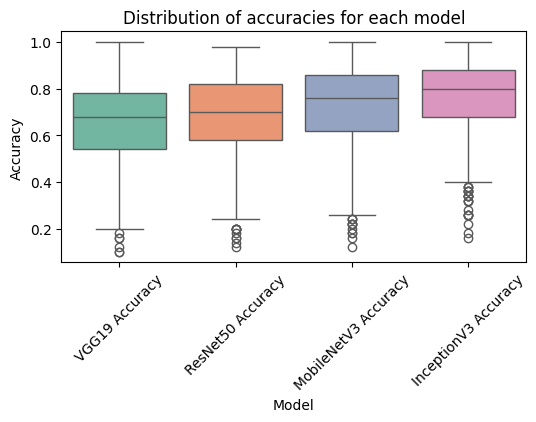

In [ ]:
# # Visualize distribution of accuracies for each model
# df_avg = df
# df_avg['row_var'] = row_variances

# df = pd.read_csv('accuracy.csv')
# df_avg = df
# df_avg['row_var'] = row_variances

plt.figure(figsize=(6, 3))
sns.boxplot(data=df.drop(columns=['Folder']), palette='Set2')
plt.title('Distribution of accuracies for each model')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.show()


In [ ]:
## Violin plot for each model: To show the distribution and density of accuracies.

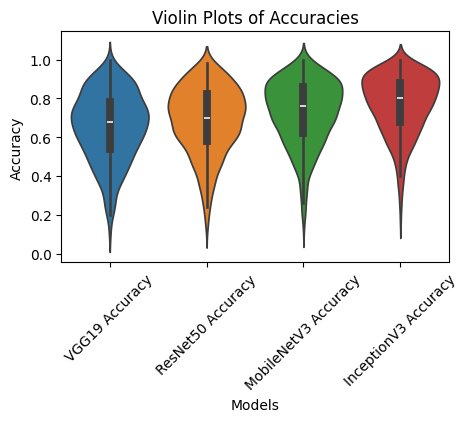

In [ ]:
# Create a violin plot for each model
plt.figure(figsize=(5, 3))
sns.violinplot(data=df[models])
plt.title('Violin Plots of Accuracies')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.show()

## Correlation heatmap

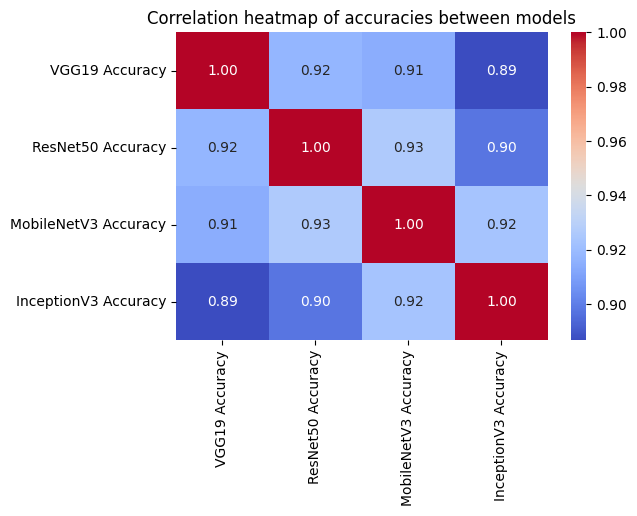

In [ ]:
# Correlation heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(df.drop(columns=['Folder']).corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation heatmap of accuracies between models')
plt.show()


## Top 5 classes with highest accuracy for each model (list)

In [ ]:

# Top 5 classes with highest accuracy for each model
for col in df.columns[1:-1]:
    print(f"\nTop 5 classes with highest accuracy for {col}:")
    print(df[['Folder', col]].nlargest(5, col))




Top 5 classes with highest accuracy for VGG19 Accuracy:
                                                Folder  VGG19 Accuracy
947                 proboscis monkey, nasalis larvatus            1.00
948  yellow lady's slipper, yellow lady-slipper, cy...            1.00
940                                              daisy            0.98
943  lesser panda, red panda, panda, bear cat, cat ...            0.98
944                          ostrich, struthio camelus            0.98

Top 5 classes with highest accuracy for ResNet50 Accuracy:
                                     Folder  ResNet50 Accuracy
918               borzoi, russian wolfhound               0.98
928       echidna, spiny anteater, anteater               0.98
931  web site, website, internet site, site               0.98
932                                flamingo               0.98
933                                  geyser               0.98

Top 5 classes with highest accuracy for MobileNetV3 Accuracy:
                

## Top 5 classes with lowest accuracy for each model (list)

In [ ]:
# Top 5 classes with lowest accuracy for each model
for col in df.columns[1:-1]:
    print(f"\nTop 5 classes with lowest accuracy for {col}:")
    print(df[['Folder', col]].nsmallest(5, col))


Top 5 classes with lowest accuracy for VGG19 Accuracy:
                Folder  VGG19 Accuracy
2              monitor            0.10
6            water jug            0.10
1               velvet            0.12
0   screen, crt screen            0.16
17             spatula            0.16

Top 5 classes with lowest accuracy for ResNet50 Accuracy:
                                    Folder  ResNet50 Accuracy
11             notebook, notebook computer               0.12
1                                   velvet               0.14
0                       screen, crt screen               0.16
3                                tiger cat               0.16
5   letter opener, paper knife, paperknife               0.18

Top 5 classes with lowest accuracy for MobileNetV3 Accuracy:
                         Folder  MobileNetV3 Accuracy
0            screen, crt screen                  0.12
1                        velvet                  0.16
2                       monitor                  0.18
1

##  Distribution of accuracies for each model

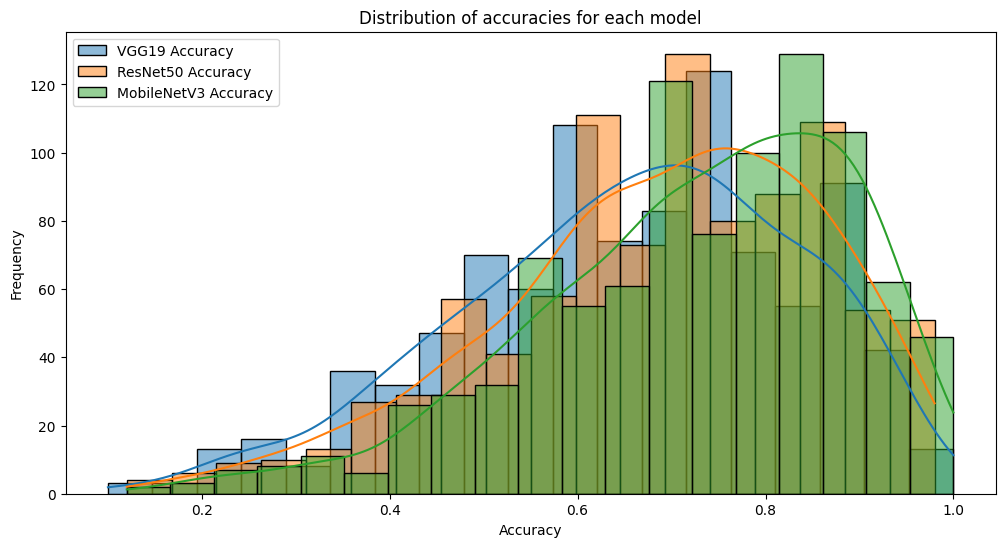

In [ ]:
# Distribution of accuracies for each model
plt.figure(figsize=(12, 6))
for col in df.columns[1:-1]:
    sns.histplot(df[col], kde=True, label=col, alpha=0.5)
plt.title('Distribution of accuracies for each model')
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
plt.legend()
plt.show()


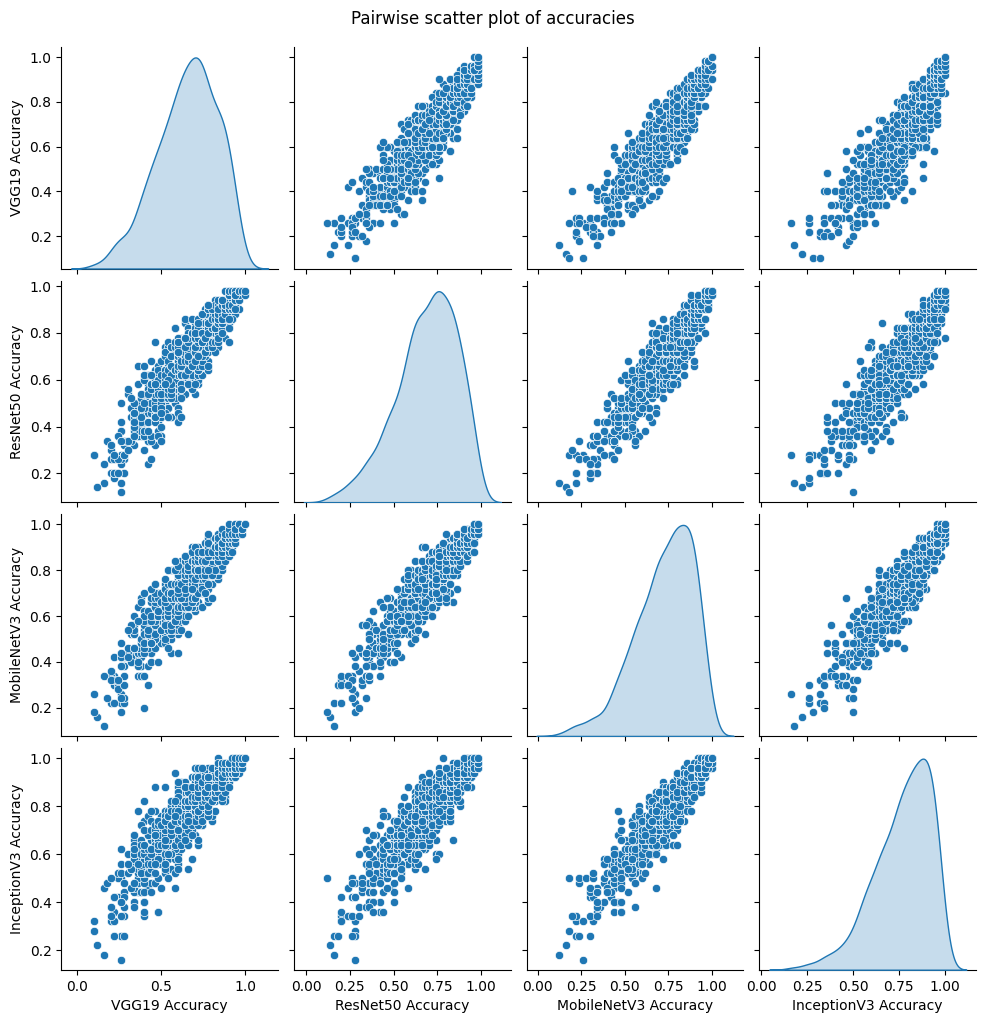

In [ ]:
# Pairwise scatter plot of accuracies
sns.pairplot(df.drop(columns=['Folder']), diag_kind='kde')
plt.suptitle('Pairwise scatter plot of accuracies', y=1.02)
plt.show()


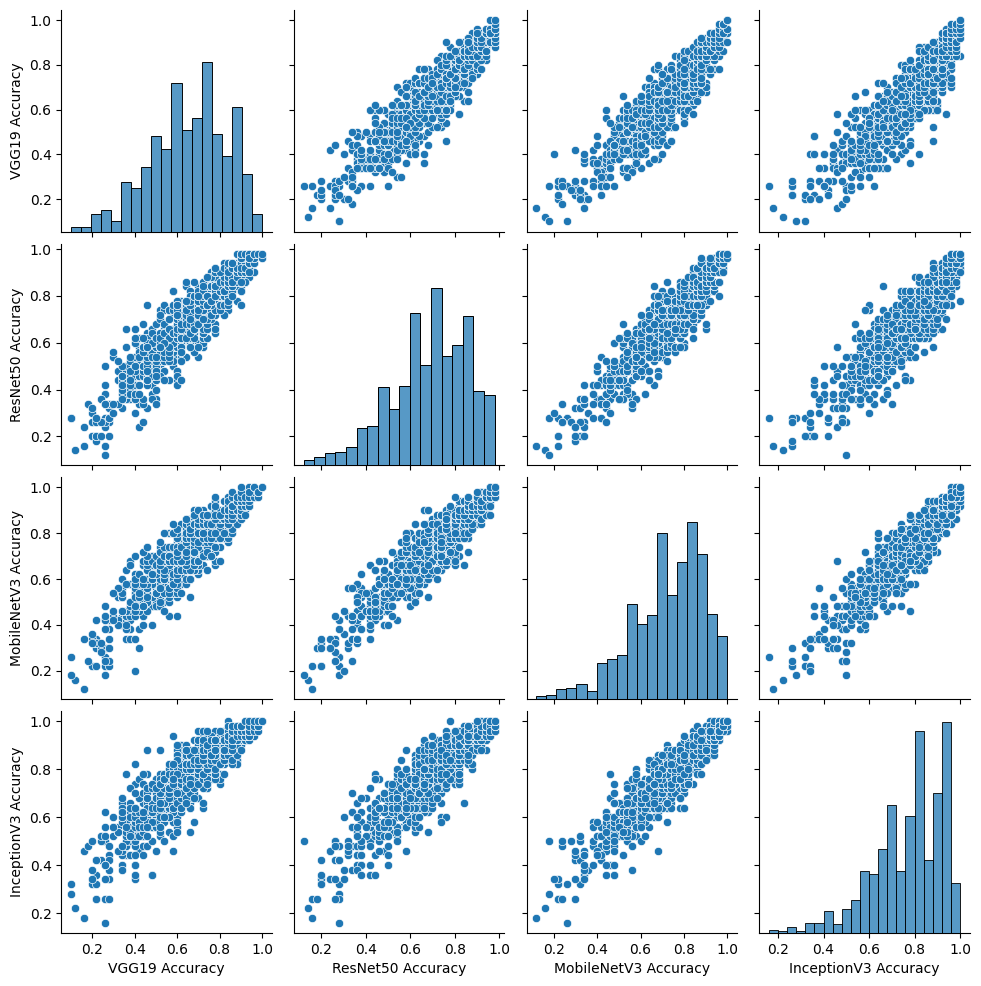

In [ ]:
import pandas as pd
import seaborn as sns

# Assuming the data is in a DataFrame named df
df = pd.read_csv('accuracy.csv')

# List of models
models = ['VGG19 Accuracy', 'ResNet50 Accuracy', 'MobileNetV3 Accuracy', 'InceptionV3 Accuracy']

# Create a scatter plot matrix
sns.pairplot(df[models])
plt.show()

# to cehck what to do

In [ ]:
# # Variability across classes
# plt.figure(figsize=(12, 6))
# sns.boxplot(data=df['row_var'], color='lightblue')
# plt.title('Variability of accuracies across classes')
# plt.xlabel('Variability')
# plt.show()


In [ ]:

# # Distribution of variability across classes
# plt.figure(figsize=(10, 6))
# sns.histplot(df['row_var'], bins=20, kde=True)
# plt.title('Distribution of variability across classes')
# plt.xlabel('Variability')
# plt.ylabel('Frequency')
# plt.show()


## Histogram for each model: To see the distribution of accuracies.

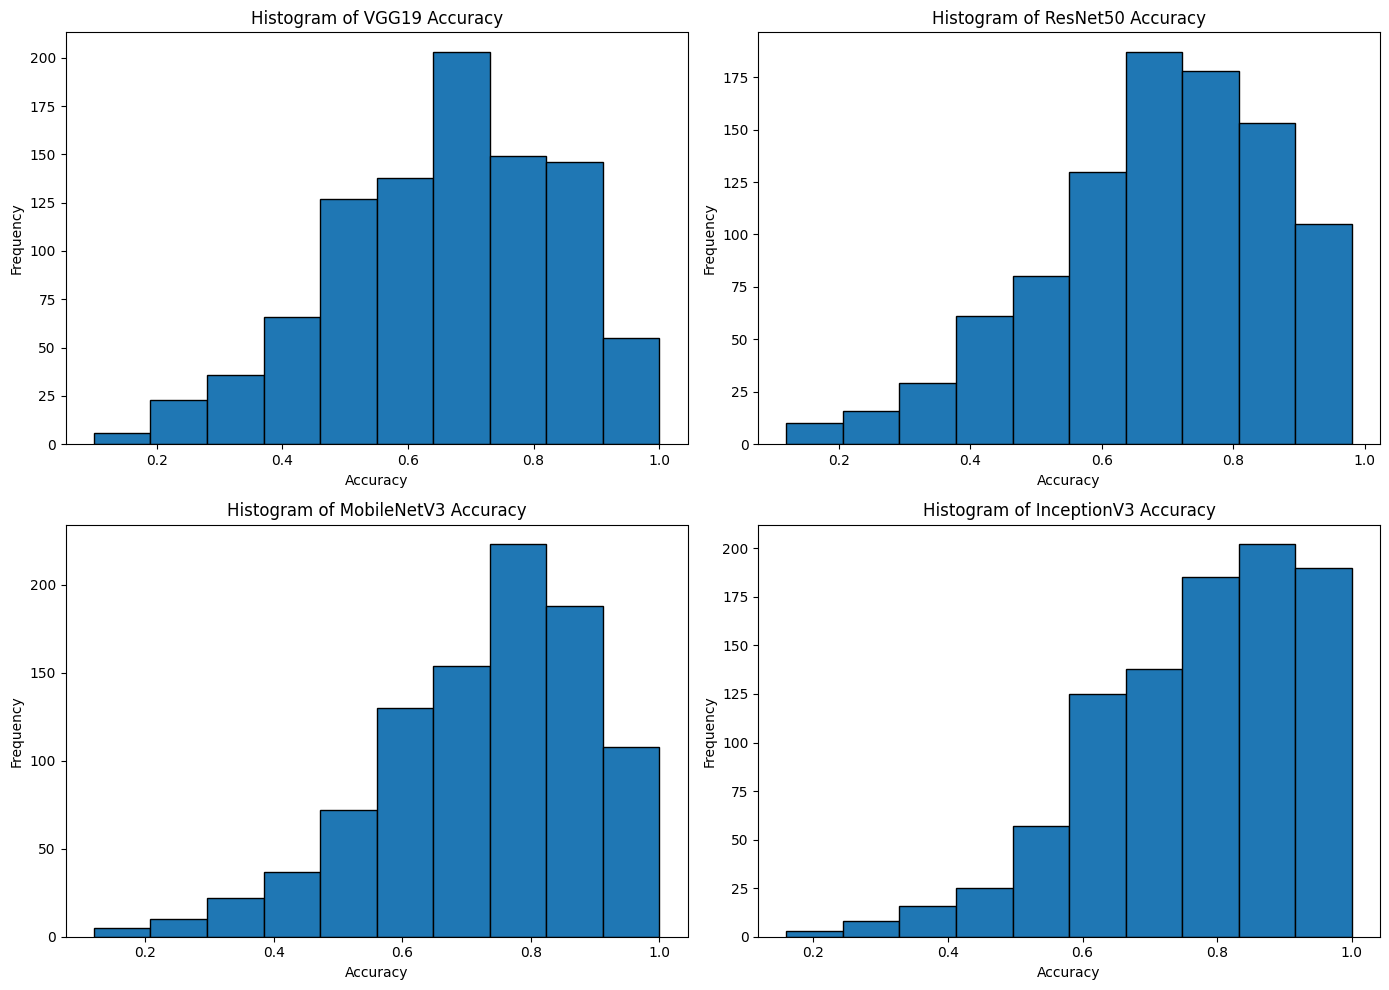

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming the data is in a DataFrame named df
df = pd.read_csv('accuracy.csv')

# List of models
models = ['VGG19 Accuracy', 'ResNet50 Accuracy', 'MobileNetV3 Accuracy', 'InceptionV3 Accuracy']

fig, axs = plt.subplots(2, 2, figsize=(14, 10))

for i, model in enumerate(models):
    row = i // 2
    col = i % 2
    axs[row, col].hist(df[model], bins=10, edgecolor='black')
    axs[row, col].set_title('Histogram of ' + model)
    axs[row, col].set_xlabel('Accuracy')
    axs[row, col].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# descriptive statistics

In [23]:
# Calculate descriptive statistics
desc_stats = df[models].describe().T
desc_stats['mode'] = df[models].mode().loc[0]
desc_stats['variance'] = df[models].var()

print(desc_stats)

highest_mean_model = desc_stats['mean'].idxmax()
lowest_std_model = desc_stats['std'].idxmin()

print(f"\n\nThe model with the highest mean is {highest_mean_model} with a mean of {desc_stats['mean'][highest_mean_model]:.2f}.")
print(f"The model with the lowest standard deviation is {lowest_std_model} with a standard deviation of {desc_stats['std'][lowest_std_model]:.2f}.")

                      count      mean       std   min   25%   50%   75%   max  \
VGG19 Accuracy        949.0  0.654289  0.178299  0.10  0.54  0.68  0.78  1.00   
ResNet50 Accuracy     949.0  0.686554  0.173525  0.12  0.58  0.70  0.82  0.98   
MobileNetV3 Accuracy  949.0  0.725859  0.166694  0.12  0.62  0.76  0.86  1.00   
InceptionV3 Accuracy  949.0  0.768535  0.154658  0.16  0.68  0.80  0.88  1.00   

                      mode  variance  
VGG19 Accuracy        0.72  0.031791  
ResNet50 Accuracy     0.74  0.030111  
MobileNetV3 Accuracy  0.88  0.027787  
InceptionV3 Accuracy  0.92  0.023919  


The model with the highest mean is InceptionV3 Accuracy with a mean of 0.77.
The model with the lowest standard deviation is InceptionV3 Accuracy with a standard deviation of 0.15.


# Kruskal-Wallis test: differences in the distribution of accuracy scores between the models?

In [24]:
import pandas as pd
from scipy.stats import kruskal

# Load the data
df = pd.read_csv('accuracy.csv')

# List of models
models = ['VGG19 Accuracy', 'ResNet50 Accuracy', 'MobileNetV3 Accuracy', 'InceptionV3 Accuracy']

# Perform the Kruskal-Wallis H-test
H, p = kruskal(df['VGG19 Accuracy'], df['ResNet50 Accuracy'], df['MobileNetV3 Accuracy'], df['InceptionV3 Accuracy'])

print(f"Kruskal-Wallis H-test result: H = {H}, p = {p}")

if p < 0.05:
    print("There is a significant difference in the distribution of accuracy scores between the models.")
else:
    print("There is no significant difference in the distribution of accuracy scores between the models.")

Kruskal-Wallis H-test result: H = 239.2532599078104, p = 1.3803451015026064e-51
There is a significant difference in the distribution of accuracy scores between the models.


# Wilcoxon signed-rank test

In [27]:
import pandas as pd
from scipy.stats import wilcoxon

# Create a DataFrame from the provided CSV data
data = {
    'VGG19 Accuracy': [0.26, 0.2, 0.22, 0.1, 0.26, 0.22, 0.28, 0.28, 0.26, 0.22, 0.22, 0.26, 0.2, 0.24, 0.16, 0.22, 0.2],
    'ResNet50 Accuracy': [0.16, 0.2, 0.18, 0.28, 0.28, 0.28, 0.2, 0.26, 0.12, 0.2, 0.2, 0.24, 0.26, 0.2, 0.24, 0.26, 0.3],
    'MobileNetV3 Accuracy': [0.22, 0.22, 0.3, 0.26, 0.26, 0.22, 0.22, 0.24, 0.18, 0.32, 0.34, 0.3, 0.34, 0.3, 0.34, 0.32, 0.36],
    'InceptionV3 Accuracy': [0.26, 0.32, 0.26, 0.32, 0.16, 0.26, 0.34, 0.26, 0.5, 0.32, 0.36, 0.34, 0.34, 0.42, 0.46, 0.42, 0.38]
}
df = pd.DataFrame(data)

# Perform the Wilcoxon signed-rank test for each pair of models
models = df.columns
for i in range(len(models)):
    for j in range(i+1, len(models)):
        model1 = models[i]
        model2 = models[j]
        W, p = wilcoxon(df[model1], df[model2])
        print(f"Wilcoxon signed-rank test result between {model1} and {model2}: W = {W}, p = {p}")
        if p < 0.05:
            print(f"There is a significant difference in accuracy between {model1} and {model2} for specific image categories.")
        else:
            print(f"There is no significant difference in accuracy between {model1} and {model2} for specific image categories.")

Wilcoxon signed-rank test result between VGG19 Accuracy and ResNet50 Accuracy: W = 65.5, p = 0.8970397746236487
There is no significant difference in accuracy between VGG19 Accuracy and ResNet50 Accuracy for specific image categories.
Wilcoxon signed-rank test result between VGG19 Accuracy and MobileNetV3 Accuracy: W = 21.0, p = 0.02672591027647051
There is a significant difference in accuracy between VGG19 Accuracy and MobileNetV3 Accuracy for specific image categories.
Wilcoxon signed-rank test result between VGG19 Accuracy and InceptionV3 Accuracy: W = 7.5, p = 0.0017483601299792424
There is a significant difference in accuracy between VGG19 Accuracy and InceptionV3 Accuracy for specific image categories.
Wilcoxon signed-rank test result between ResNet50 Accuracy and MobileNetV3 Accuracy: W = 23.0, p = 0.00933837890625
There is a significant difference in accuracy between ResNet50 Accuracy and MobileNetV3 Accuracy for specific image categories.
Wilcoxon signed-rank test result betwe

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


# Pearson correlation coefficient between word count and average accuracy

In [31]:
import pandas as pd

# Load the CSV data
data = pd.read_csv('accuracy.csv')

# Calculate the number of words in each category name
data['word_count'] = data['Folder'].apply(lambda x: len(x.split()))

# Calculate the average accuracy for each category
data['average_accuracy'] = data[['VGG19 Accuracy', 'ResNet50 Accuracy', 'MobileNetV3 Accuracy', 'InceptionV3 Accuracy']].mean(axis=1)

# Calculate the Pearson correlation coefficient between word count and average accuracy
correlation = data['word_count'].corr(data['average_accuracy'])

print(correlation)

0.04399489009836592
